<a href="https://colab.research.google.com/github/menezesglesia/Tarefas-P-s/blob/main/Tarefa_Trilha_2_Glesia_Menezes_Coleta_de_Dados_e_Armazenamento_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://github.com/menezesglesia/Tarefas-P-s/blob/main/Tarefa_Trilha_2_Glesia_Menezes_Coleta_de_Dados_e_Armazenamento_.ipynb

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
req = requests.get('https://www.basketball-reference.com/leagues/NBA_2018_totals.html')
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

Requisição bem sucedida!


In [ ]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

In [ ]:
table = soup.find(name='table', attrs={'id':'confs_standings_W'})

In [ ]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2020)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020


In [ ]:
df = df[df.index.duplicated()]
df.reset_index(inplace=True)

In [ ]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

In [ ]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

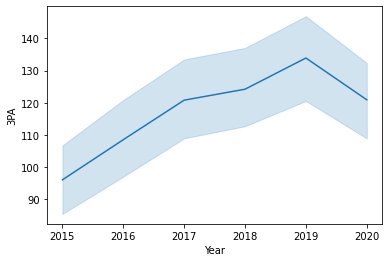

In [ ]:

sns.lineplot(x='Year', y='3PA', data=df)